UCI Dataset Link: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set                  
Research Papers:
1) Ahmed M., Kashem M.A., Rahman M., Khatun S. (2020) Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)
2) IoT based Risk Level Prediction Model for Maternal Health Care in the Context of Bangladesh, STI-2020

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Data Collection & Preprocessing

In [3]:
maternal_data = pd.read_csv('data/maternal_health_risk_dataset.csv')
maternal_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
maternal_data.shape

(1014, 7)

In [5]:
maternal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
maternal_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Data Analysis

In [7]:
maternal_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
maternal_data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [9]:
maternal_data.replace({'RiskLevel':{'low risk': 0, 'mid risk': 1, 'high risk': 2}}, inplace=True)

Data Visualization

In [10]:
sns.set()

<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

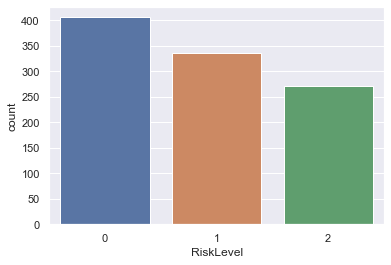

In [11]:
sns.countplot(x='RiskLevel',data=maternal_data)

Separating Features & Target

In [12]:
X = maternal_data.drop(columns='RiskLevel',axis=1)
Y = maternal_data['RiskLevel']

Splitting the Data into Training & Testing Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(1014, 6) (811, 6) (203, 6)


In [15]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1Score = []

Model Training - Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1500)
lg.fit(X_train.values,Y_train.values)

LogisticRegression(max_iter=1500)

Model Evaluation - Logistic Regression

In [17]:
lg_X_train_prediction = lg.predict(X_train.values)
lg_X_test_prediction = lg.predict(X_test.values)

In [18]:
lg_train_data_accuracy = accuracy_score(Y_train,lg_X_train_prediction)
print("Accuracy of Training Data using Logistic Regression: ", lg_train_data_accuracy)

Accuracy of Training Data using Logistic Regression:  0.6189889025893958


In [19]:
lg_test_data_accuracy = accuracy_score(Y_test,lg_X_test_prediction)
lg_test_data_precision = precision_score(Y_test,lg_X_test_prediction,average='macro')
lg_test_data_recall = recall_score(Y_test,lg_X_test_prediction,average='macro')
lg_test_data_f1 = f1_score(Y_test,lg_X_test_prediction,average='macro')

In [20]:
Model.append("Logistic Regression")
Accuracy.append(lg_test_data_accuracy)
Precision.append(lg_test_data_precision)
Recall.append(lg_test_data_recall)
F1Score.append(lg_test_data_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

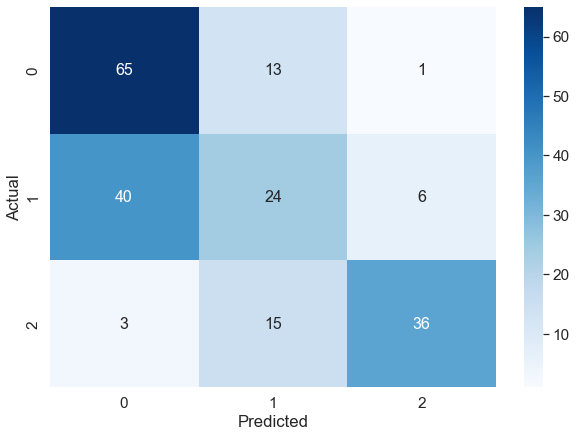

In [21]:
data = confusion_matrix(Y_test,lg_X_test_prediction)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Model Training - Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.values,Y_train.values)

GaussianNB()

Model Evaluation - Naive Bayes

In [23]:
nb_X_train_prediction = nb.predict(X_train.values)
nb_X_test_prediction = nb.predict(X_test.values)

In [24]:
nb_train_data_accuracy = accuracy_score(Y_train,nb_X_train_prediction)
print("Accuracy of Training Data using Naive Bayes: ", nb_train_data_accuracy)

Accuracy of Training Data using Naive Bayes:  0.6128236744759556


In [25]:
nb_test_data_accuracy = accuracy_score(Y_test,nb_X_test_prediction)
nb_test_data_precision = precision_score(Y_test,nb_X_test_prediction,average='macro')
nb_test_data_recall = recall_score(Y_test,nb_X_test_prediction,average='macro')
nb_test_data_f1 = f1_score(Y_test,nb_X_test_prediction,average='macro')
print("Accuracy of Testing Data using Logistic Regression: ", nb_test_data_accuracy)
print("Precision of Testing Data using Logistic Regression: ", nb_test_data_precision)
print("Recall of Testing Data using Logistic Regression: ", nb_test_data_recall)
print("F1 Score of Testing Data using Logistic Regression: ", nb_test_data_f1)

Accuracy of Testing Data using Logistic Regression:  0.5665024630541872
Precision of Testing Data using Logistic Regression:  0.5941144441144441
Recall of Testing Data using Logistic Regression:  0.5517558547094411
F1 Score of Testing Data using Logistic Regression:  0.5257173382173382


In [26]:
Model.append("Naive Bayes")
Accuracy.append(nb_test_data_accuracy)
Precision.append(nb_test_data_precision)
Recall.append(nb_test_data_recall)
F1Score.append(nb_test_data_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

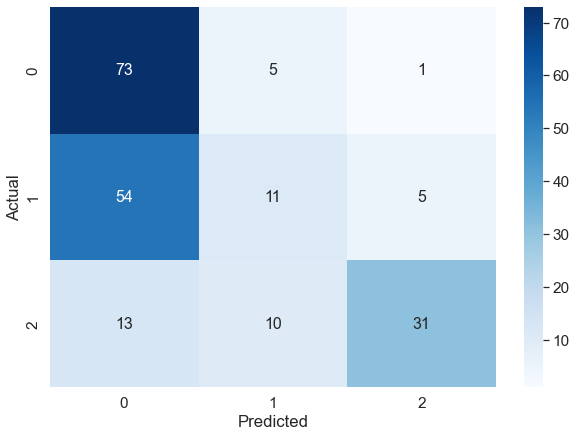

In [27]:
data = confusion_matrix(Y_test,nb_X_test_prediction)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Model Training - Random Forest

In [28]:
import os
import random
from sklearn.ensemble import RandomForestClassifier
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
rf = RandomForestClassifier(max_depth = 10, random_state=seed_value)
rf.fit(X_train.values, Y_train.values) 

RandomForestClassifier(max_depth=10, random_state=50)

Model Evaulation - Random Forest

In [29]:
rf_X_train_prediction = rf.predict(X_train.values)
rf_X_test_prediction = rf.predict(X_test.values)

In [30]:
rf_train_data_accuracy = accuracy_score(Y_train,rf_X_train_prediction)
print("Accuracy of Training Data using Random Forest: ", rf_train_data_accuracy)

Accuracy of Training Data using Random Forest:  0.8988902589395807


In [31]:
rf_test_data_accuracy = accuracy_score(Y_test,rf_X_test_prediction)
rf_test_data_precision = precision_score(Y_test,rf_X_test_prediction,average='macro')
rf_test_data_recall = recall_score(Y_test,rf_X_test_prediction,average='macro')
rf_test_data_f1 = f1_score(Y_test,rf_X_test_prediction,average='macro')

In [32]:
Model.append("Random Forest")
Accuracy.append(rf_test_data_accuracy)
Precision.append(rf_test_data_precision)
Recall.append(rf_test_data_recall)
F1Score.append(rf_test_data_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

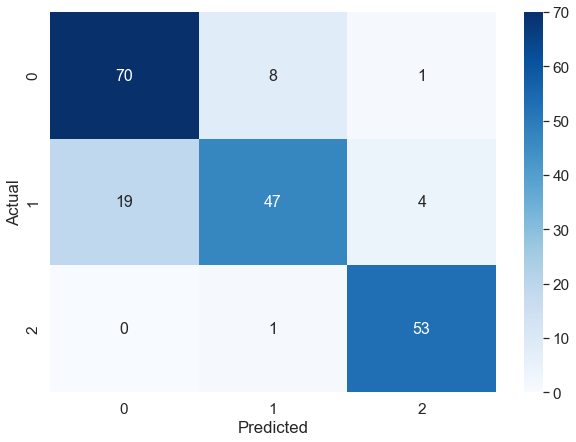

In [33]:
data = confusion_matrix(Y_test,rf_X_test_prediction)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
rf_X_test_prediction_proba = rf.predict_proba(X_test.values)
roc_auc_score(Y_test,rf_X_test_prediction_proba,multi_class="ovr")

0.9532887287745796

In [35]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'Recall':Recall, 'Precision': Precision, 'F1Score':F1Score})
result

,Model,Accuracy,Recall,Precision,F1Score
0,Logistic Regression,0.615764,0.610770,0.633533,0.610299
1,Naive Bayes,0.566502,0.551756,0.594114,0.525717
2,Random Forest,0.837438,0.846329,0.846532,0.841931


In [36]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

Making a Predictive System

In [ ]:
age = int(input("Enter Age: "))
systolicBP = int(input("Enter Systolic BP: "))
diastolicBP = int(input("Enter Diastolic BP: "))
bloodSugar = float(input("Enter BS: "))
bodyTemp = float(input("Enter Body Temperature(in F): "))
heartRate = int(input("Enter Heart Rate: "))

In [ ]:
input_data = (age,systolicBP,diastolicBP,bloodSugar,bodyTemp,heartRate)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = rf.predict(input_data_reshaped)
print("Predicted Risk Level:", prediction)